In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds = pd.read_csv("Titanic.csv")
ds.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [73]:
ds.dropna(inplace = True)
ds.drop(["Name",],axis=1,inplace=True)

In [74]:
ds.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ds["Sex"] = encoder.fit_transform(ds["Sex"])
ds.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ds.drop("Survived",axis = 1),ds["Survived"],test_size=0.2)
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

In [86]:
pred = model.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
print("acc={}  f1score={}".format(acc,f1))

acc=0.7808988764044944  f1score=0.6666666666666666


(178,)


<Axes: >

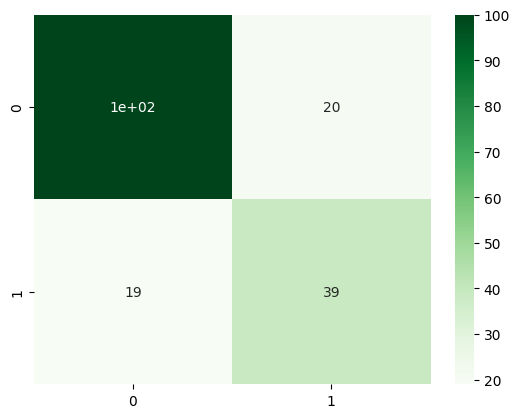

In [95]:

print(y_test.shape)
cm = confusion_matrix(pred,y_test)
sns.heatmap(cm,annot=True,cmap='Greens')

0.7260361771827376


<Axes: >

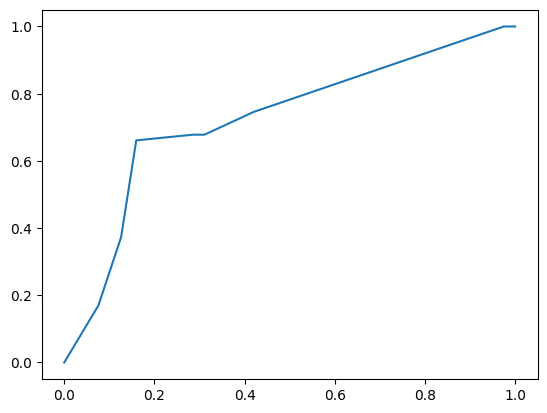

In [94]:
from sklearn.metrics import roc_curve,auc
prob = model.predict_proba(x_test)
prob = prob[:,1]
fpr,tpr,_ = roc_curve(y_test,prob)
area = auc(fpr,tpr)
print(area)
sns.lineplot(x=fpr,y=tpr)